### 2R Robot Arm
[Forward Kinematics, by Ashley Stevens](https://opentextbooks.clemson.edu/wangrobotics/chapter/forward-kinematics/)

![planar arm example](https://opentextbooks.clemson.edu/app/uploads/sites/15/2021/09/DH_Examples-07-300x275.png)
![planar arm example](https://opentextbooks.clemson.edu/app/uploads/sites/15/2021/09/DH_Examples-08-300x265.png)

[Inverse Kinematics, by Akshit Lunia](https://opentextbooks.clemson.edu/wangrobotics/chapter/inverse-kinematics/)

![planar arm example](https://opentextbooks.clemson.edu/app/uploads/sites/15/2021/09/Picture1-300x283.jpg)
![planar arm example](https://opentextbooks.clemson.edu/app/uploads/sites/15/2021/09/Picture2-300x260.jpg)

In [1]:
%matplotlib widget
# Dependencies
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

# Settings
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150

In [2]:
class RobotArm(object):
    def __init__(self, l1, l2, th1, th2, ax):
        self.l1 = l1
        self.l2 = l2
        self.th1 = th1
        self.th2 = th2
        points = self.forward_kinematics(self.th1, self.th2)
        self.arm_plot = ax.plot(points[:,0], points[:,1], '-ob', linewidth=3, markersize=5)[0]
        self.trj_plot = ax.plot(points[-1,0], points[-1,1], '-r', linewidth=0.5)[0]
    
    def set_angles(self, th1, th2):
        self.th1 = th1
        self.th2 = th2

    def forward_kinematics(self, th1, th2):
        """ Compute end-effector position from joint angles """
        p0 = np.zeros(2)
        p1 = np.array([self.l1*np.cos(th1), self.l1*np.sin(th1)])
        p2 = np.array([self.l2*np.cos(th1 + th2), self.l2*np.sin(th1 + th2)]) + p1
        points = np.array([p0, p1, p2])
        return points
    
    def inverse_kinematics(self, pos):
        """ Compute joint angles from end-effector position """
        r = np.linalg.norm(pos)
        th1 = np.atan2(pos[1], pos[0]) - np.acos((self.l1**2 + r**2 - self.l2**2)/(2*self.l1*r))
        th2 = np.pi - np.acos((self.l1**2 + self.l2**2 - r**2)/(2*self.l1*self.l2))
        theta = np.array([th1, th2])
        return theta

    def update(self):
        points = self.forward_kinematics(self.th1, self.th2)
        self.arm_plot.set_data(points[:,0], points[:,1])
        pt_arr = np.array(self.trj_plot.get_data())
        pt_arr = np.c_[pt_arr, points[-1]]
        self.trj_plot.set_data(pt_arr[0], pt_arr[1])

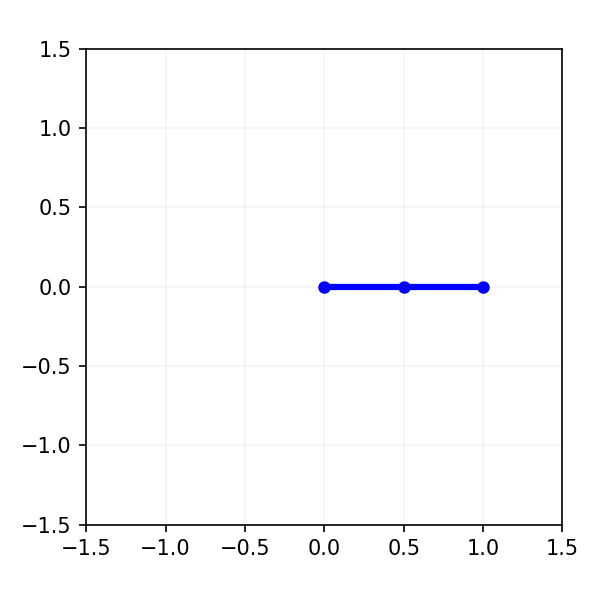

In [ ]:
try:
    ani.event_source.stop()
except (NameError, AttributeError) as e:
    pass

l1 = 0.5
l2 = 0.5

fig = plt.figure(figsize=(4,4))
fig.set_label("2R Robot Arm")
ax = fig.subplots()
ax.set_xlim((-1.5*(l1+l2), 1.5*(l1+l2)))
ax.set_ylim((-1.5*(l1+l2), 1.5*(l1+l2)))
ax.set_aspect("equal")
ax.grid(linewidth=.1)

robot = RobotArm(l1, l2, 0, 0, ax)

t = np.linspace(0, 1, 100).reshape((-1,1))
p1 = np.array([1, 0]).reshape((-1,2))
p2 = np.array([0.5, 0.5]).reshape((-1,2))
points = p2*(1-t) + p1*t
theta_cartesian = np.array([robot.inverse_kinematics(point) for point in points])
jts_1 = robot.inverse_kinematics(p1.ravel()).reshape((-1,2))
jts_2 = robot.inverse_kinematics(p2.ravel()).reshape((-1,2))
theta_joint = jts_1*(1-t) + jts_2*t
theta_arr = np.r_[theta_joint, theta_cartesian]

def update(theta):
    robot.set_angles(theta[0], theta[1])
    robot.update()

ani = matplotlib.animation.FuncAnimation(fig, update, frames=theta_arr, interval=40, repeat=False)
fig.tight_layout()
plt.show()